# Lines and Boxes

## MinMax sin poda Alfa-Beta

In [ ]:
"""
Lines and Boxes
Autores:    Cristopher Acuña Campos 2022437718
            Jerson Prendas 2022437678
Fecha: Septiembre 2025
"""

import numpy as np
import copy

class DotsAndBoxes:
    def __init__(self, size=3, against_computer=True):
        self.size = size
        self.against_computer = against_computer
        # Matrices de numpy para líneas horizontales y verticales
        self.h_lines = np.zeros((size + 1, size), dtype=bool)
        self.v_lines = np.zeros((size, size + 1), dtype=bool)
        self.boxes = np.full((size, size), None, dtype=object)

        self.players = ["A", "IA" if against_computer else "B"]
        self.turn = 0
        self.scores = {player: 0 for player in self.players}

        print(self.h_lines.shape)
        print(self.v_lines.shape)
        print(self.boxes.shape)

    def draw_board(self):
        size = self.size
        for r in range(size + 1):
            # puntos + líneas horizontales
            for c in range(size):
                print("●", end="")
                print("──" if self.h_lines[r, c] else "  ", end="")
            print("●")

            if r < size:
                for c in range(size + 1):
                    print("│" if self.v_lines[r, c] else " ", end="")
                    if c < size:
                        owner = self.boxes[r, c]
                        print(owner if owner else " ", end=" ")
                print()
        print()

    def make_move(self, line_type, row, col):
        player = self.players[self.turn]
        completed_box = False

        if line_type not in ["h", "v"]:
            print("Tipo de línea inválido.")
            return False
        elif line_type == "h" and (row < 0 or row > self.size or col < 0 or col >= self.size):
            print("Movimiento inválido.")
            return False
        elif line_type == "v" and (row < 0 or row >= self.size or col < 0 or col > self.size):
            print("Movimiento inválido.")
            return False

        if line_type == "h" and not self.h_lines[row, col]:
            self.h_lines[row, col] = True
            completed_box = self.check_boxes("h", row, col, player)
        elif line_type == "v" and not self.v_lines[row, col]:
            self.v_lines[row, col] = True
            completed_box = self.check_boxes("v", row, col, player)
        else:
            print("Movimiento inválido.")
            return False

        if not completed_box:
            self.turn = (self.turn + 1) % len(self.players)
        return True

    def check_boxes(self, line_type, row, col, player):
        completed = False
        if line_type == "h":
            if row > 0 and self.is_box_complete(row-1, col):
                self.boxes[row-1, col] = player
                self.scores[player] += 1
                completed = True
            if row < self.size and self.is_box_complete(row, col):
                self.boxes[row, col] = player
                self.scores[player] += 1
                completed = True
        elif line_type == "v":
            if col > 0 and self.is_box_complete(row, col-1):
                self.boxes[row, col-1] = player
                self.scores[player] += 1
                completed = True
            if col < self.size and self.is_box_complete(row, col):
                self.boxes[row, col] = player
                self.scores[player] += 1
                completed = True
        return completed

    def is_box_complete(self, row, col):
        return (
            self.h_lines[row, col] and
            self.h_lines[row+1, col] and
            self.v_lines[row, col] and
            self.v_lines[row, col+1]
        )

    def is_game_over(self):
        return np.all(self.boxes != None)

    def get_against_computer(self):
        return self.against_computer

    def get_number_current_player(self) -> int:
        return self.turn

def winner(state: DotsAndBoxes) -> str | None:
    player1, player2 = state.players
    score1, score2 = state.scores[player1], state.scores[player2]
    if score1 > score2:
        return player1
    elif score2 > score1:
        return player2
    else:
        return None

def utility(state: DotsAndBoxes) -> int:
    winner_player = winner(state)
    if winner_player == state.players[0]:
        return state.scores[winner_player]
    elif winner_player == state.players[1]:
        return -state.scores[winner_player]
    else:
        return 0

def possible_moves(state: DotsAndBoxes) -> set:
    moves = set()
    h_possible_positions = np.argwhere(state.h_lines == False)
    v_possible_positions = np.argwhere(state.v_lines == False)

    for (r, c) in h_possible_positions:
        moves.add(("h", int(r), int(c)))
    for (r, c) in v_possible_positions:
        moves.add(("v", int(r), int(c)))

    return moves

def result_next_state(state: DotsAndBoxes, move: tuple) -> DotsAndBoxes:
    line_type, row, col = move
    new_state_copy = copy.deepcopy(state)
    new_state_copy.make_move(line_type, row, col)
    return new_state_copy

def max_value(state: DotsAndBoxes):
    if state.is_game_over():
        return utility(state)

    result_actions = []
    max_value_state = float('-inf')
    for action in possible_moves(state=state):
        result_next_state_game: DotsAndBoxes = result_next_state(state, action)
        # Si el jugador actual no cambia por que completó box, se llama a max_value de nuevo
        if state.get_number_current_player() == result_next_state_game.get_number_current_player():
            max_value_state = max(max_value_state, max_value(result_next_state_game))
        else:
            max_value_state = max(max_value_state, min_value(result_next_state_game))

    return max_value_state

def min_value(state: DotsAndBoxes):
    if state.is_game_over():
        return utility(state)

    min_value_state = float('inf')
    for action in possible_moves(state=state):
        result_next_state_game: DotsAndBoxes = result_next_state(state, action)
        # Si el jugador actual no cambia por que completó box, se llama a min_value de nuevo
        if state.get_number_current_player() == result_next_state_game.get_number_current_player():
            min_value_state = min(min_value_state, min_value(result_next_state_game))
        else:
            min_value_state = min(min_value_state, max_value(result_next_state_game))

    return min_value_state

def min_max(state: DotsAndBoxes):
    if state.is_game_over():
            return None

    result_actions = []
    for move in possible_moves(state=state):
        next_state = result_next_state(state, move)
        if state.turn == 0:  # Jugador
            score = min_value(next_state)
        else:  # Computadora
            score = max_value(next_state)
        result_actions.append((move, score))

    if not result_actions:
        return None

    if state.turn == 0:
        best_action = max(result_actions, key=lambda x: x[1])
    else:
        best_action = min(result_actions, key=lambda x: x[1])
    return best_action[0]

if __name__ == "__main__":
    game = DotsAndBoxes(size=2, against_computer=True)

    while not game.is_game_over():
        game.draw_board()
        if game.get_against_computer() and game.get_number_current_player() == 1:
            print("Turno de la computadora.")

            best_action = min_max(game)
            game.make_move(best_action[0], best_action[1], best_action[2])
            print(f"La computadora jugó: {best_action[0]} {best_action[1]} {best_action[2]}")

        else:
            print("Turno del jugador:", game.players[game.turn])
            move = input("Movimiento (h/v fila col): ").split()
            if len(move) != 3:
                print("Formato inválido.")
                continue
            t, r, c = move[0], int(move[1]), int(move[2])
            game.make_move(t, r, c)

    game.draw_board()
    print("Juego terminado. Puntajes:")
    for p, s in game.scores.items():
        print(f"{p}: {s}")


(3, 2)
(2, 3)
(2, 2)
●──●  ●
       
●  ●  ●
      │
●  ●  ●

Turno del jugador: A
●──●  ●
       
●  ●  ●
      │
●──●  ●

Turno de la computadora.
La computadora jugó: v 0 1
●──●  ●
   │   
●  ●  ●
      │
●──●  ●

Turno del jugador: A


KeyboardInterrupt: Interrupted by user

(3, 2)
(2, 3)
(2, 2)
●──●  ●
       
●  ●  ●
      │
●  ●  ●

Turno del jugador: A
●──●  ●
       
●  ●  ●
      │
●──●  ●

Turno de la computadora.
La computadora jugó: v 0 1
●──●  ●
   │   
●  ●  ●
      │
●──●  ●

Turno del jugador: A
Formato inválido.
●──●  ●
   │   
●  ●  ●
      │
●──●  ●

Turno del jugador: A
Formato inválido.
●──●  ●
   │   
●  ●  ●
      │
●──●  ●

Turno del jugador: A
Formato inválido.
●──●  ●
   │   
●  ●  ●
      │
●──●  ●

Turno del jugador: A
Formato inválido.
●──●  ●
   │   
●  ●  ●
      │
●──●  ●

Turno del jugador: A
Formato inválido.
●──●  ●
   │   
●  ●  ●
      │
●──●  ●

Turno del jugador: A
Formato inválido.
●──●  ●
   │   
●  ●  ●
      │
●──●  ●

Turno del jugador: A
Formato inválido.
●──●  ●
   │   
●  ●  ●
      │
●──●  ●

Turno del jugador: A
Formato inválido.
●──●  ●
   │   
●  ●  ●
      │
●──●  ●

Turno del jugador: A
Formato inválido.
●──●  ●
   │   
●  ●  ●
      │
●──●  ●

Turno del jugador: A
Formato inválido.
●──●  ●
   │   
●  ●  ●


KeyboardInterrupt: Interrupted by user

## MinMax con poda Alfa-Beta

In [ ]:
import numpy as np
import copy
import time

estados_visitados = 0

class DotsAndBoxes:
    def __init__(self, size=3, against_computer=True, parent=None):
        self.size = size
        self.against_computer = against_computer
        # Matrices de numpy para líneas horizontales y verticales
        self.h_lines = np.zeros((size + 1, size), dtype=bool)
        self.v_lines = np.zeros((size, size + 1), dtype=bool)
        self.boxes = np.full((size, size), None, dtype=object)

        self.players = ["A", "C" if against_computer else "B"]
        self.turn = 0
        self.scores = {player: 0 for player in self.players}

        self.parent = parent

        print(self.h_lines.shape)
        print(self.v_lines.shape)
        print(self.boxes.shape)

    def draw_board(self):
        size = self.size
        for r in range(size + 1):
            # puntos + líneas horizontales
            for c in range(size):
                print("●", end="")
                print("──" if self.h_lines[r, c] else "  ", end="")
            print("●")

            if r < size:
                for c in range(size + 1):
                    print("│" if self.v_lines[r, c] else " ", end="")
                    if c < size:
                        owner = self.boxes[r, c]
                        print(owner if owner else " ", end=" ")
                print()
        print()

    def make_move(self, line_type, row, col):
        player = self.players[self.turn]
        completed_box = False

        if line_type not in ["h", "v"]:
            print("Tipo de línea inválido.")
            return False
        elif line_type == "h" and (row < 0 or row > self.size or col < 0 or col >= self.size):
            print("Movimiento inválido.")
            return False
        elif line_type == "v" and (row < 0 or row >= self.size or col < 0 or col > self.size):
            print("Movimiento inválido.")
            return False

        if line_type == "h" and not self.h_lines[row, col]:
            self.h_lines[row, col] = True
            completed_box = self.check_boxes("h", row, col, player)
        elif line_type == "v" and not self.v_lines[row, col]:
            self.v_lines[row, col] = True
            completed_box = self.check_boxes("v", row, col, player)
        else:
            print("Movimiento inválido.")
            return False

        if not completed_box:
            self.turn = (self.turn + 1) % len(self.players)
        return True

    def check_boxes(self, line_type, row, col, player):
        completed = False
        if line_type == "h":
            if row > 0 and self.is_box_complete(row-1, col):
                self.boxes[row-1, col] = player
                self.scores[player] += 1
                completed = True
            if row < self.size and self.is_box_complete(row, col):
                self.boxes[row, col] = player
                self.scores[player] += 1
                completed = True
        elif line_type == "v":
            if col > 0 and self.is_box_complete(row, col-1):
                self.boxes[row, col-1] = player
                self.scores[player] += 1
                completed = True
            if col < self.size and self.is_box_complete(row, col):
                self.boxes[row, col] = player
                self.scores[player] += 1
                completed = True
        return completed

    def is_box_complete(self, row, col):
        return (
            self.h_lines[row, col] and
            self.h_lines[row+1, col] and
            self.v_lines[row, col] and
            self.v_lines[row, col+1]
        )

    def is_game_over(self):
        return np.all(self.boxes != None)

    def get_against_computer(self):
        return self.against_computer

    def get_number_current_player(self) -> int:
        return self.turn

def winner(state: DotsAndBoxes) -> str | None:
    player1, player2 = state.players
    score1, score2 = state.scores[player1], state.scores[player2]
    if score1 > score2:
        return player1
    elif score2 > score1:
        return player2
    else:
        return None

def utility(state: DotsAndBoxes) -> int:
    winner_player = winner(state)
    if winner_player == state.players[0]:
        return state.scores[winner_player]
    elif winner_player == state.players[1]:
        return -state.scores[winner_player]
    else:
        return 0

def possible_moves(state: DotsAndBoxes) -> set:
    moves = set()
    h_possible_positions = np.argwhere(state.h_lines == False)
    v_possible_positions = np.argwhere(state.v_lines == False)

    for (r, c) in h_possible_positions:
        moves.add(("h", int(r), int(c)))
    for (r, c) in v_possible_positions:
        moves.add(("v", int(r), int(c)))

    return moves

def result_next_state(state: DotsAndBoxes, move: tuple) -> DotsAndBoxes:
    line_type, row, col = move
    new_state_copy = copy.deepcopy(state)
    new_state_copy.make_move(line_type, row, col)
    return new_state_copy

def max_value(state: DotsAndBoxes, alfa: int | float, beta: int | float):
    global estados_visitados
    estados_visitados += 1

    if state.is_game_over():
        return utility(state), []

    max_value_state = float('-inf')
    best_path = []
    for action in possible_moves(state=state):
        result_next_state_game: DotsAndBoxes = result_next_state(state, action)
        if state.get_number_current_player() == result_next_state_game.get_number_current_player():
            value, path = max_value(result_next_state_game, alfa, beta)
        else:
            value, path = min_value(result_next_state_game, alfa, beta)

        if value > max_value_state:
            max_value_state = value
            best_path = [action] + path

        alfa = max(alfa, max_value_state)
        if alfa >= beta:
            break  # aplica la poda alfa-beta

    return max_value_state, best_path

def min_value(state: DotsAndBoxes, alfa: int | float, beta: int | float):
    global estados_visitados
    estados_visitados += 1

    if state.is_game_over():
        return utility(state), []

    min_value_state = float('inf')
    best_path = []
    for action in possible_moves(state=state):
        result_next_state_game: DotsAndBoxes = result_next_state(state, action)
        if state.get_number_current_player() == result_next_state_game.get_number_current_player():
            value, path = min_value(result_next_state_game, alfa, beta)
        else:
            value, path = max_value(result_next_state_game, alfa, beta)

        if value < min_value_state:
            min_value_state = value
            best_path = [action] + path

        beta = min(beta, min_value_state)
        if alfa >= beta:
            break  # aplica la poda alfa-beta

    return min_value_state, best_path

def min_max(state: DotsAndBoxes):
    if state.is_game_over():
        return None

    alfa = float('-inf')
    beta = float('inf')
    result_actions = []
    for move in possible_moves(state=state):
        next_state = result_next_state(state, move)
        if state.turn == 0:  # Jugador
            score, path = min_value(next_state, alfa, beta)
        else:  # Computadora
            score, path = max_value(next_state, alfa, beta)
        result_actions.append((move, score, [move] + path))

    if not result_actions:
        return None

    if state.turn == 0:
        best_action = max(result_actions, key=lambda x: x[1])
    else:
        best_action = min(result_actions, key=lambda x: x[1])
        
    return best_action[0], best_action[2]


In [7]:
# Tablero de 2x2 para pruebas

game = DotsAndBoxes(size=2, against_computer=True)
time_algorithm = []
amount_possible_moves = []

while not game.is_game_over():
    game.draw_board()
    print()
    print()
    if game.get_against_computer() and game.get_number_current_player() == 1:
        print("Turno de la computadora.")
        length_possible_moves = len(possible_moves(game))

        estados_visitados = 0
        start_time = time.time()
        best_action = min_max(game)
        end_time = time.time()
        game.make_move(best_action[0][0], best_action[0][1], best_action[0][2])
        print(f"La computadora jugó: {best_action[0][0]} {best_action[0][1]} {best_action[0][2]}")
        print(f"Estados visitados: {estados_visitados}")
        print(f"Tiempo de ejecución: {end_time - start_time:.4f} segundos")

        print("Recorrido optimo:")
        for action in best_action[1]:
            print(f" - {action[0]} {action[1]} {action[2]}")

        time_algorithm.append(end_time - start_time)
        amount_possible_moves.append(length_possible_moves)

    else:
        print("Turno del jugador:", game.players[game.turn])
        move = input("Movimiento (h/v fila col): ").split()
        if len(move) != 3:
            print("Formato inválido.")
            continue
        t, r, c = move[0], int(move[1]), int(move[2])
        game.make_move(t, r, c)

game.draw_board()
print("Juego terminado. Puntajes:")
for p, s in game.scores.items():
    print(f"{p}: {s}")

(3, 2)
(2, 3)
(2, 2)
●  ●  ●
       
●  ●  ●
       
●  ●  ●



Turno del jugador: A
●  ●  ●
   │   
●  ●  ●
       
●  ●  ●



Turno de la computadora.
La computadora jugó: v 1 1
Estados visitados: 856869
Tiempo de ejecución: 36.0534 segundos
Recorrido optimo:
 - v 1 1
 - v 0 2
 - h 2 0
 - h 2 1
 - h 0 0
 - v 1 2
 - h 1 1
 - h 0 1
 - v 0 0
 - h 1 0
 - v 1 0
●  ●  ●
   │   
●  ●  ●
   │   
●  ●  ●



Turno del jugador: A


KeyboardInterrupt: Interrupted by user

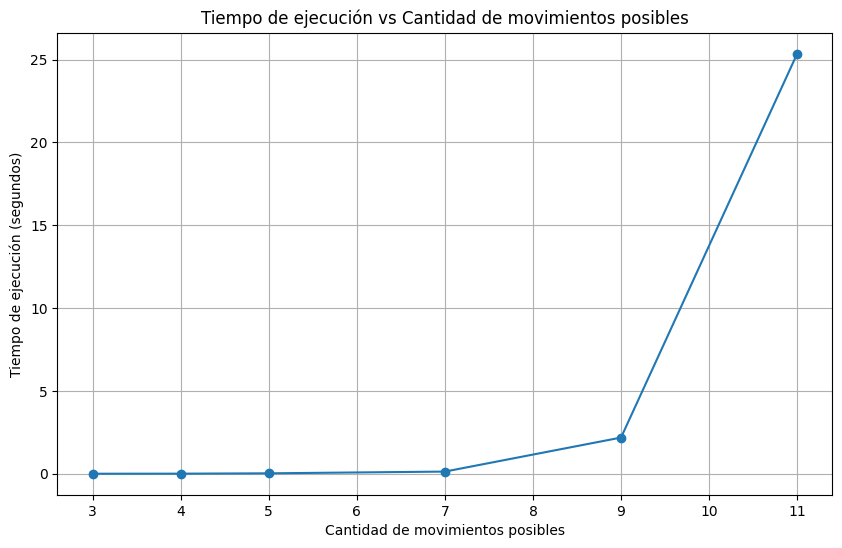

In [14]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(10, 6))
plt.plot(amount_possible_moves, time_algorithm, marker='o')
plt.title('Tiempo de ejecución vs Cantidad de movimientos posibles')
plt.xlabel('Cantidad de movimientos posibles')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.grid()
plt.show()